In [8]:
import pandas as pd
import os

In [9]:
def calculate_values(df,subject_name,method,order):
    # データ範囲を取得
    data = df.values
    # print(data)
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    place_values=[  [0.31, -0.04, 0.035],
                        [0.31, -0.04, 0.075],
                        [0.31, -0.04, 0.115],
                        [0.31, 0.0, 0.035],
                        [0.31, 0.0, 0.075],
                        [0.31, 0.0, 0.115],
                        [0.31, 0.04, 0.035],
                        [0.31, 0.04, 0.075],
                        [0.31, 0.04, 0.115],
                        [0.35, -0.04, 0.035],
                        [0.35, -0.04, 0.075],
                        [0.35, -0.04, 0.115],
                        [0.35, 0.0, 0.035],
                        [0.35, 0.0, 0.075],
                        [0.35, 0.0, 0.115],
                        [0.35, 0.04, 0.035],
                        [0.35, 0.04, 0.075],
                        [0.35, 0.04, 0.115],
                        [0.39, -0.04, 0.035],
                        [0.39, -0.04, 0.075],
                        [0.39, -0.04, 0.115],
                        [0.39, 0.0, 0.035],
                        [0.39, 0.0, 0.075],
                        [0.39, 0.0, 0.115],
                        [0.39, 0.04, 0.035],
                        [0.39, 0.04, 0.075],
                        [0.39, 0.04, 0.115]]
    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
        else:
            results.append([
                subject_name,
                order,
                row_count,
                method,
                place_value,
                abs(float(data[i][0])-place_values[place_value][0]),
               abs(float(data[i][1])-place_values[place_value][1]),
              abs(float(data[i][2])-place_values[place_value][2]),
                ])
            row_count+=1
    return results
            
    
    
    

In [10]:
# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [11]:
import pathlib
import datetime
# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name,sorted_indices):
    for i, file_path in enumerate(files_paths):
            method=i-1

            order=sorted_indices.index(i-1)
            print(i-1,file_path,order)
            df = read_txt_to_dataframe(file_path)
            # all_results.extend(calculate_values_averages(df,subject_name, method,order))
            all_results.extend(calculate_values(df,subject_name, method,order))
            
            # all_results.extend(calculate_values_median(df,subject_name, method,order))

In [12]:
import os
from datetime import datetime

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [13]:

subject_names=["菊池","河合","竹村"]


for i in range(len(subject_names)):
        root_path = r"C:\Users\takaharayota\Research\Semi-Exp3\Values\{}".format(subject_names[i])
        files_paths = [
                root_path + r"\Dense_0.04.txt",
                root_path + r"\Sparse_0.04.txt",
                root_path + r"\NoSound_0.04.txt",
        
        ]

        # ファイル名と元のインデックスのタプルのリストを作成
        indexed_files = list(enumerate(files_paths))
        # 作成日時順に並べ替える
        sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # 並べ替え後のインデックスを抽出
        sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i],sorted_indices)
    
print(all_results)  


# 統合されたデータをデータフレームに変換
columns = ['Subject','Order','Count','Method', 'Place', 'X', 'Y', 'Z']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output.txt', sep='\t', index=False)

print("DataFrameの内容がoutput.txtに出力されました。")

-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\菊池\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\菊池\Sparse_0.04.txt 1
1 C:\Users\takaharayota\Research\Semi-Exp3\Values\菊池\NoSound_0.04.txt 2
-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\河合\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\河合\Sparse_0.04.txt 1
1 C:\Users\takaharayota\Research\Semi-Exp3\Values\河合\NoSound_0.04.txt 2
-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\竹村\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\竹村\Sparse_0.04.txt 2
1 C:\Users\takaharayota\Research\Semi-Exp3\Values\竹村\NoSound_0.04.txt 1
[['菊池', 0, 0, -1, 15, 0.0032777999999999974, 0.011782190000000001, 0.001090600000000004], ['菊池', 0, 0, -1, 6, 0.0005786999999999876, 0.0036670999999999995, 0.009512229999999997], ['菊池', 0, 0, -1, 0, 0.013728299999999971, 0.007231099999999997, 0.0024708199999999986], ['菊池', 0, 0, -1, 25, 0.0357711, 0.004335470000000001, 0.004735870000000003], ['菊池', 0, 0, -

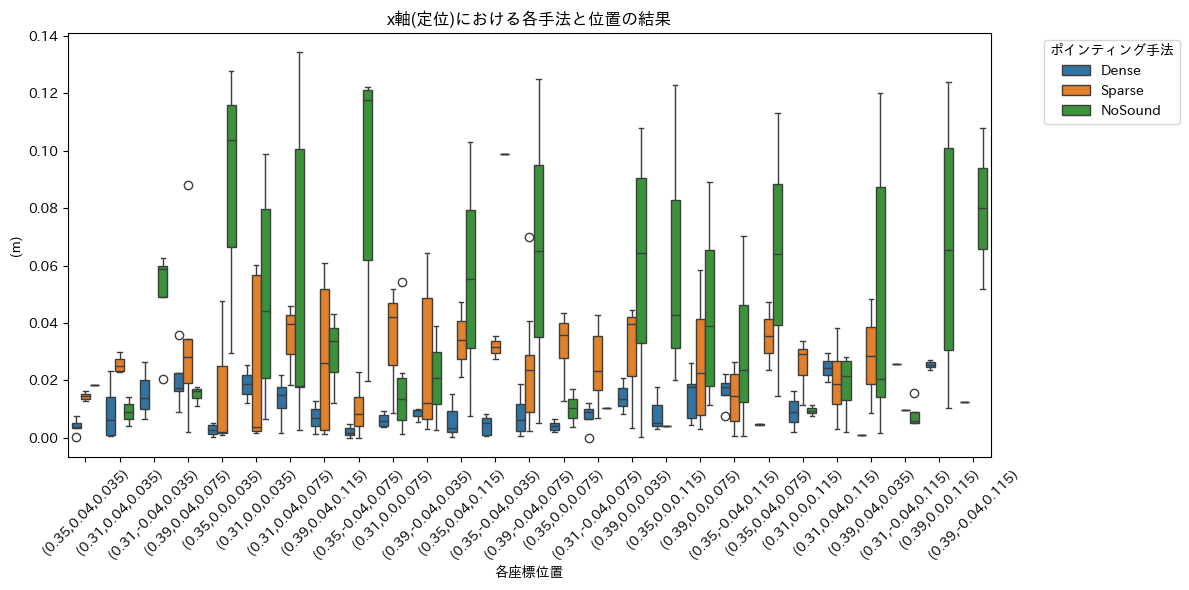

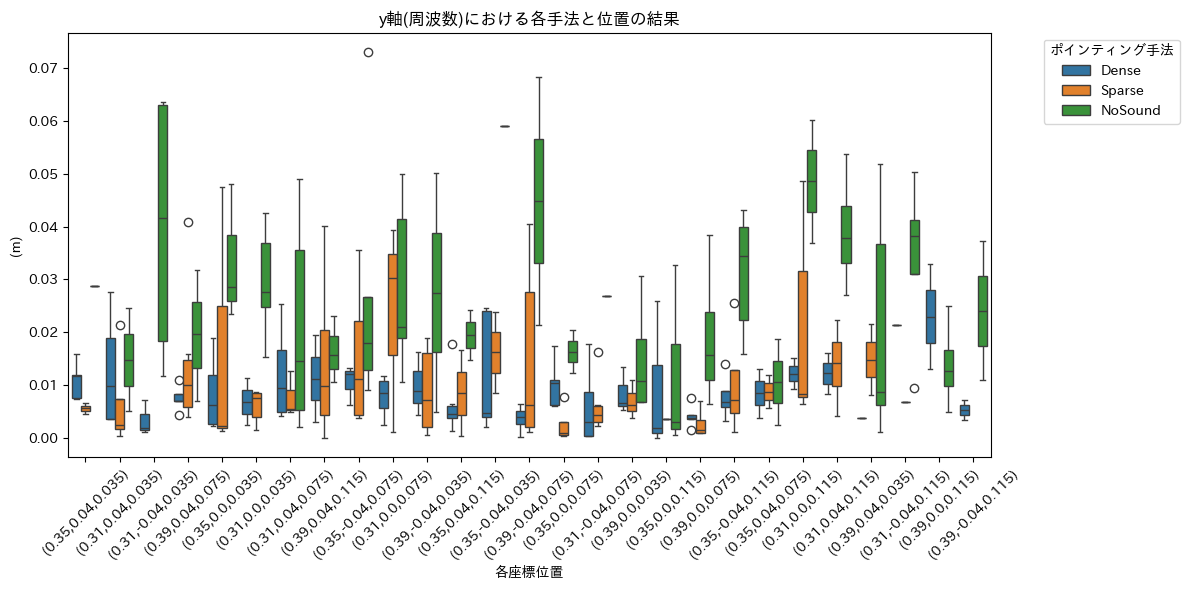

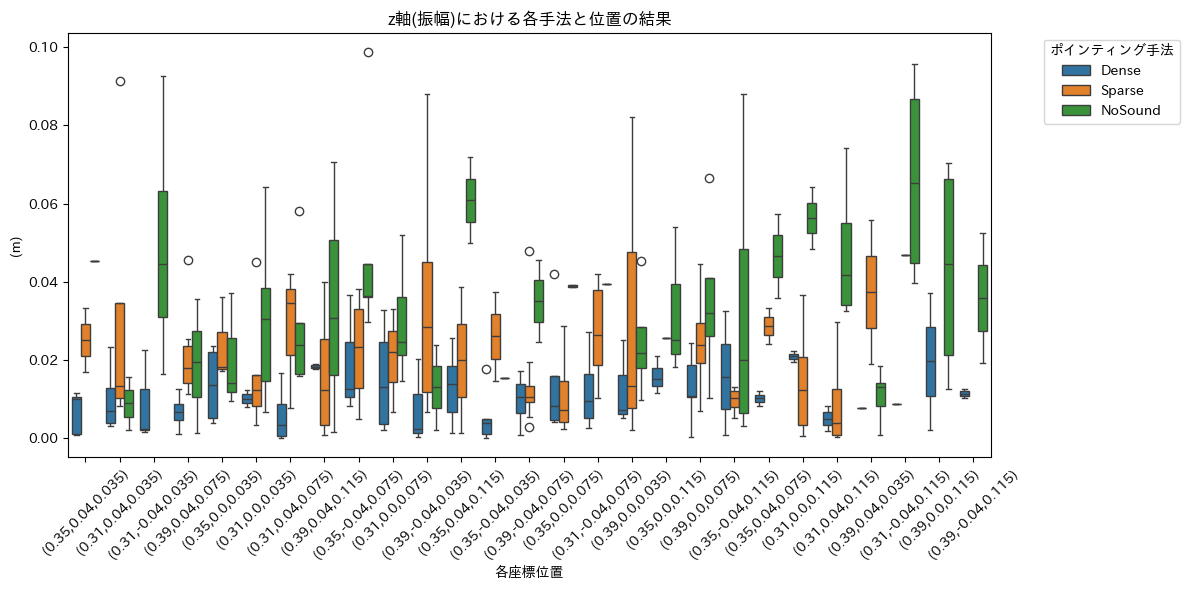

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: 'Dense',
    0: 'Sparse',
    1: 'NoSound',
  

  
    
    

}

place_labels ={0: '(0.31,-0.04,0.035)',
 1: '(0.31,-0.04,0.075)',
 2: '(0.31,-0.04,0.115)',
 3: '(0.31,0.0,0.035)',
 4: '(0.31,0.0,0.075)',
 5: '(0.31,0.0,0.115)',
 6: '(0.31,0.04,0.035)',
 7: '(0.31,0.04,0.075)',
 8: '(0.31,0.04,0.115)',
 9: '(0.35,-0.04,0.035)',
 10: '(0.35,-0.04,0.075)',
 11: '(0.35,-0.04,0.115)',
 12: '(0.35,0.0,0.035)',
 13: '(0.35,0.0,0.075)',
 14: '(0.35,0.0,0.115)',
 15: '(0.35,0.04,0.035)',
 16: '(0.35,0.04,0.075)',
 17: '(0.35,0.04,0.115)',
 18: '(0.39,-0.04,0.035)',
 19: '(0.39,-0.04,0.075)',
 20: '(0.39,-0.04,0.115)',
 21: '(0.39,0.0,0.035)',
 22: '(0.39,0.0,0.075)',
 23: '(0.39,0.0,0.115)',
 24: '(0.39,0.04,0.035)',
 25: '(0.39,0.04,0.075)',
 26: '(0.39,0.04,0.115)'}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


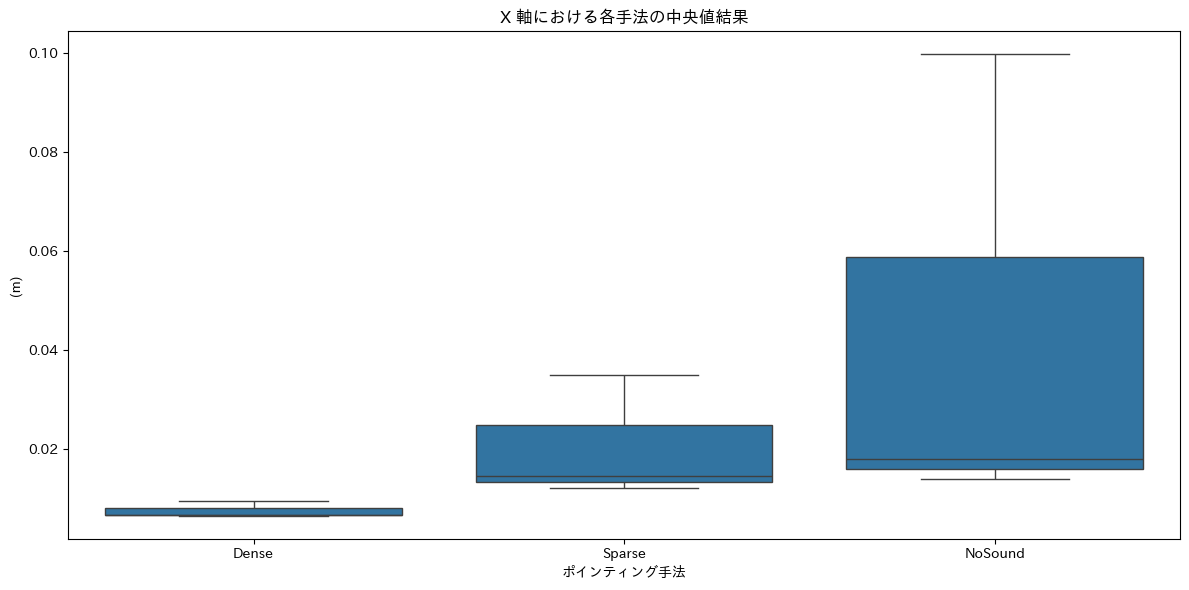

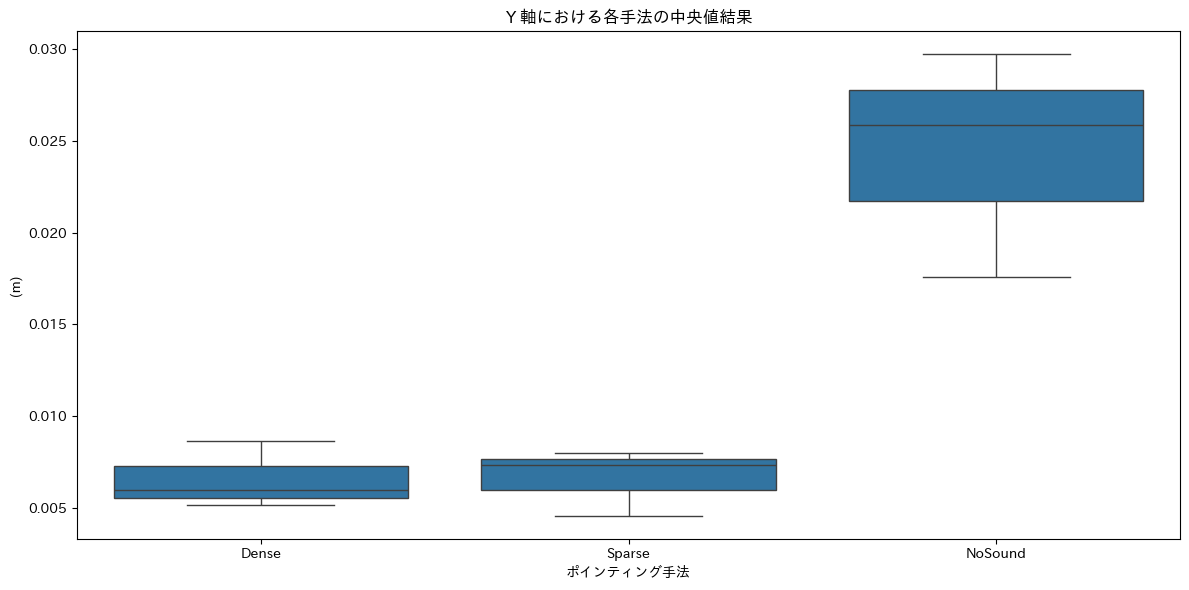

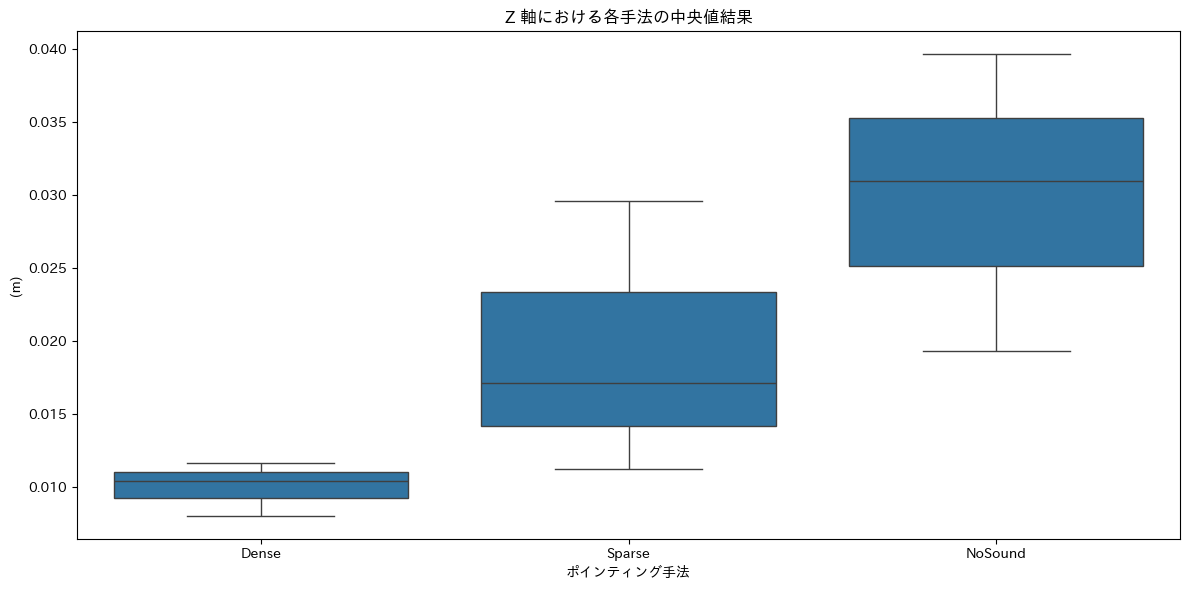

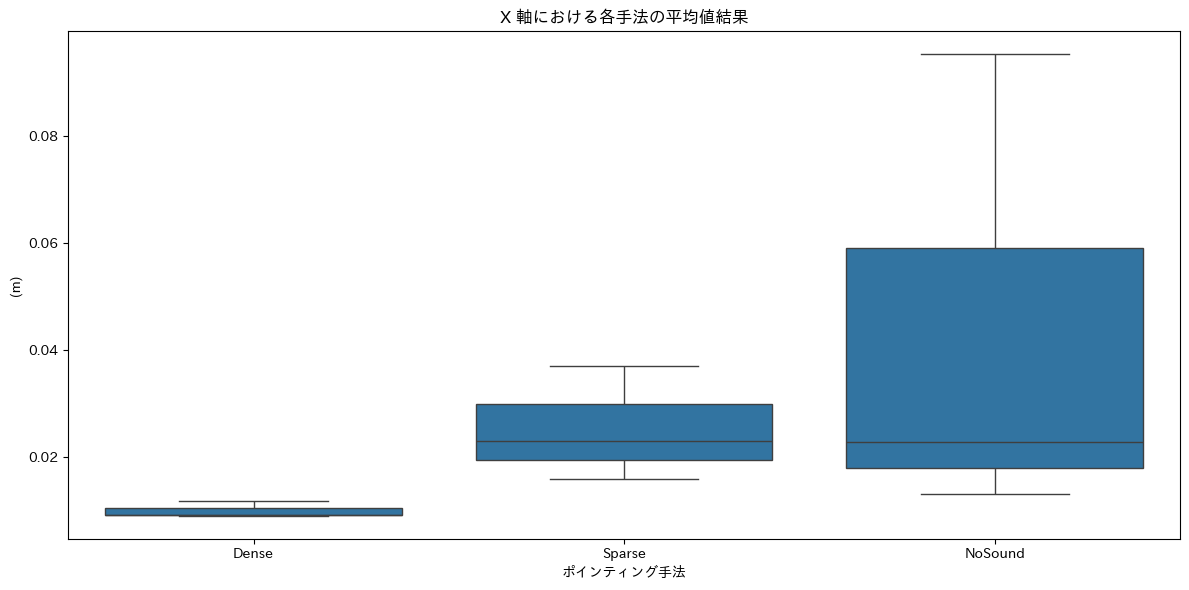

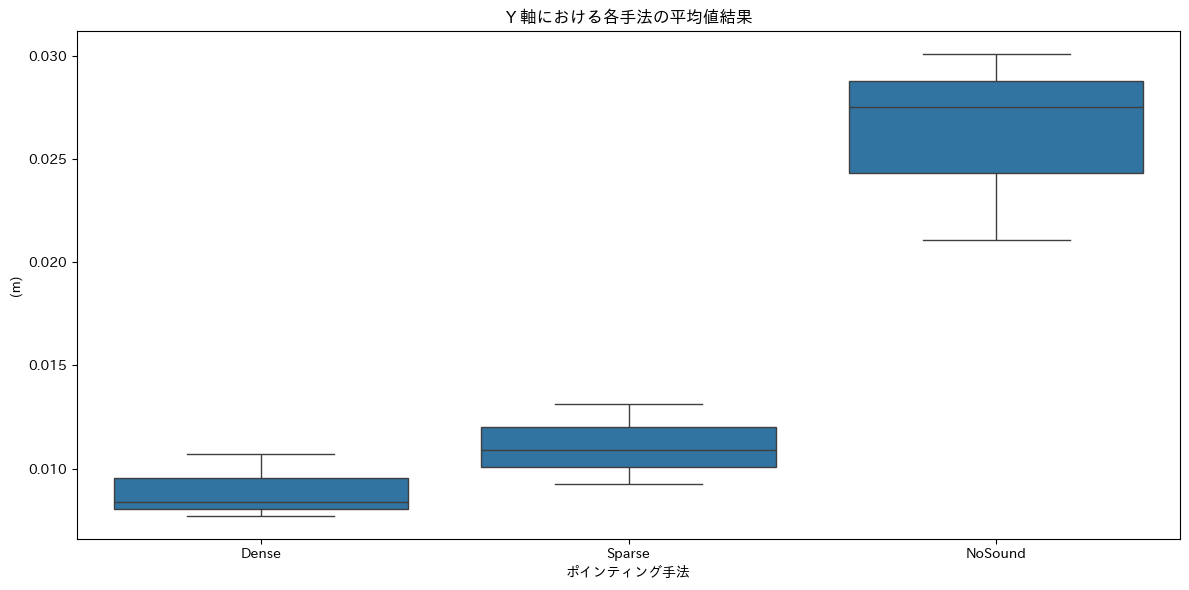

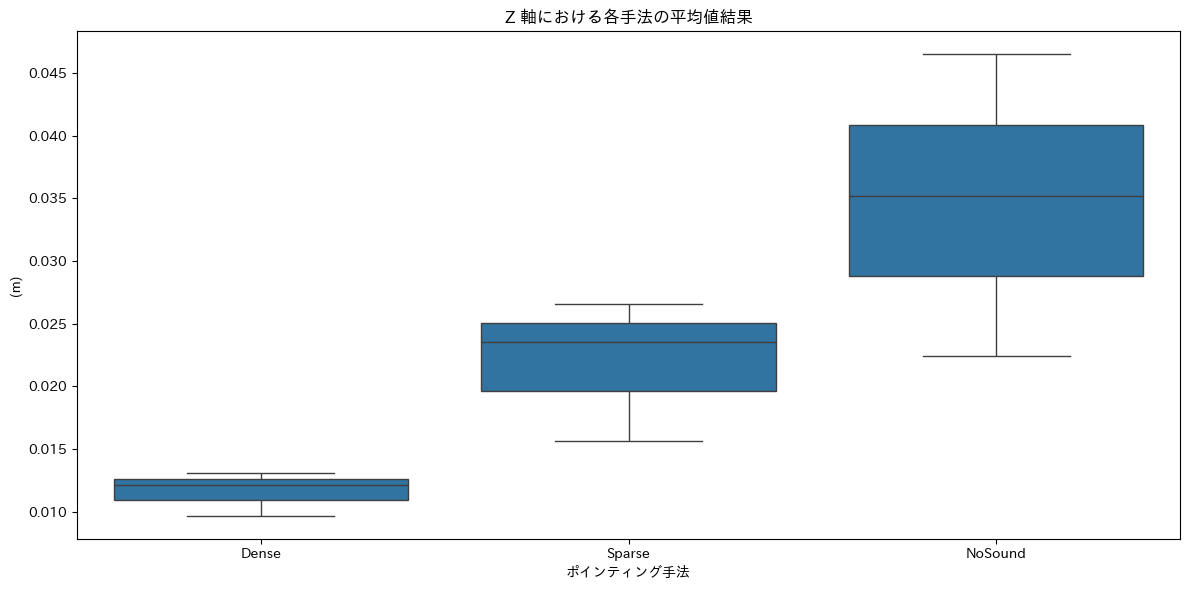

In [15]:
# Placeごとの中央値を計算 (数値列のみ対象)
numeric_columns = ['X', 'Y', 'Z']
df_median = df_all.groupby(['Subject', 'Method'])[numeric_columns].median().reset_index()

# Placeごとの平均値を計算 (数値列のみ対象)
df_mean = df_all.groupby(['Subject', 'Method'])[numeric_columns].mean().reset_index()

# Methodのラベルを追加
df_median['Method_Label'] = df_median['Method'].map(method_labels)
df_mean['Method_Label'] = df_mean['Method'].map(method_labels)

# 中央値プロット
for axis in ['X', 'Y', 'Z']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Method_Label', y=axis, data=df_median)
    plt.title(f'{axis} 軸における各手法の中央値結果')
    plt.xlabel('ポインティング手法')
    plt.ylabel('(m)')
    plt.tight_layout()
    plt.show()

# 平均値プロット
for axis in ['X', 'Y', 'Z']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Method_Label', y=axis, data=df_mean)
    plt.title(f'{axis} 軸における各手法の平均値結果')
    plt.xlabel('ポインティング手法')
    plt.ylabel('(m)')
    plt.tight_layout()
    plt.show()